<a href="https://colab.research.google.com/github/Faheemmalla/Machine_Learning/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

#DATASET LOADING

In [82]:
df = pd.read_csv("HousePriceDataset.csv")

In [83]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [84]:
X = df[["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt"]].values
y = df["Price"].values
print(X.shape)
print(y.shape)

(2000, 5)
(2000,)


#Normalistaion/scaling

In [85]:
X_mean = X.mean(axis=0) #columnwise mean
X_std = X.std(axis=0) #columnwise standard deviation
X = (X - X_mean) / X_std
print(X)

[[-1.10147065  1.40179052  1.30556821  1.24415065  0.23815548]
 [ 1.14748543  1.40179052  1.30556821  1.24415065 -0.09594152]
 [ 0.62231712 -0.70458141 -0.49832569  1.24415065 -0.65276985]
 ...
 [-1.33161794  1.40179052 -1.40027264  0.00803475 -1.62721943]
 [ 0.9853011  -0.00245743 -1.40027264  0.00803475 -0.70845269]
 [ 0.15661639  1.40179052 -1.40027264  1.24415065 -1.62721943]]


#Cost Function

In [86]:
def compute_cost(x,y,w,b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    fwb = np.dot(x[i],w) + b
    cost = cost + (fwb - y[i])**2
  total_cost = 1/(2*m) * cost
  return total_cost

In [87]:
initialw = np.zeros(X.shape[1])
intitalb = 0
compute_cost(X,y,initialw,intitalb)

np.float64(182735550347.467)

#Gradient Descent

In [88]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        fwb = np.dot(x[i],w) + b
        dj_dw = dj_dw + (fwb - y[i])*x[i]
        dj_db = dj_db + (fwb - y[i])
    dj_db = dj_db/m
    dj_dw = dj_dw/m
    return dj_dw, dj_db

In [89]:
def gradient_descent(x, y, w_in, b_in, gradient_function, alpha, num_iters):
    m = len(x)
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b

In [90]:
initial_w = np.zeros(X.shape[1])
initial_b = 0.
iterations = 1500
alpha = 0.01
w_final, b_final = gradient_descent(X, y, initial_w, initial_b, compute_gradient, alpha, iterations)


In [91]:
print("w:", w_final)
print("b:", b_final)

w: [  327.15956274 -1175.18094827 -4823.07429571 15601.78050001
  1423.15789174]
b: 537676.7024847616


In [92]:
final_cost = compute_cost(X, y, w_final, b_final)
print("Final Cost:", final_cost)


Final Cost: 38054784682.99075


In [93]:
def predict(x,w,b):
  y = np.dot(x,w)+b
  return y

In [94]:
y_pred = predict(X, w_final, b_final)
print(y_pred)

[549122.0340575  549382.3287666  559593.74279348 ... 540156.87870303
 543872.67651601 559929.37773179]


In [95]:
print("Initial Cost:", compute_cost(X, y, initial_w, initial_b))
print("Final Cost:", compute_cost(X, y, w_final, b_final))

Initial Cost: 182735550347.467
Final Cost: 38054784682.99075


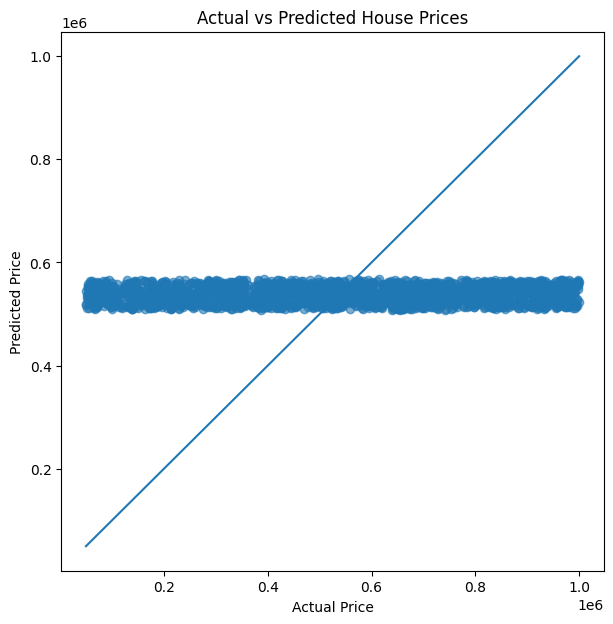

In [104]:
plt.figure(figsize=(7,7))
plt.scatter(y, y_pred, alpha=0.6)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [102]:
print("Mean price:", np.mean(y))
print("Mean prediction:", np.mean(y_pred))

Mean price: 537676.855
Mean prediction: 537676.7024847617
